In [1]:
from polypy import read as rd
from polypy import density as Dens
from polypy import utils as ut
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.palette="tab10"
sns.set_style("ticks")

In [2]:
timestep = 0.25
data = rd.read_history("example_data/HISTORY", ["CA", "F"])

In [3]:
# Create Density object

total_density = Dens.Density(data)
ca_density = Dens.Density(data, atom_type="CA")
f_density = Dens.Density(data, atom_type="F")

In [4]:
plane = total_density.one_dimensional_density_sb(ul=5.0, ll=-5.0)
print("Total Number of U and O Between -5.0 - 5.0 :", plane, " across ", data['timesteps'], "timesteps")

plane = ca_density.one_dimensional_density_sb(ul=5.0, ll=-5.0)
print("Total Number of U Between -5.0 - 5.0 :", plane, " across ", data['timesteps'], "timesteps")

plane = f_density.one_dimensional_density_sb(ul=5.0, ll=-5.0)
print("Total Number of O Between -5.0 - 5.0 :", plane, " across ", data['timesteps'], "timesteps")

Total Number of U and O Between -5.0 - 5.0 : 54377  across  100 timesteps
Total Number of U Between -5.0 - 5.0 : 16291  across  100 timesteps
Total Number of O Between -5.0 - 5.0 : 38086  across  100 timesteps


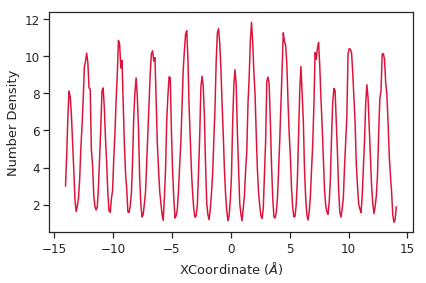

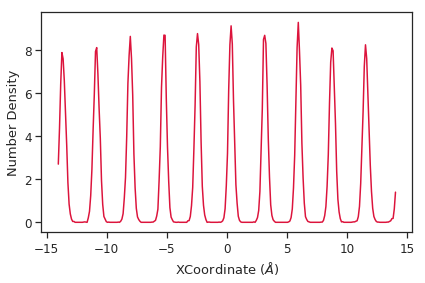

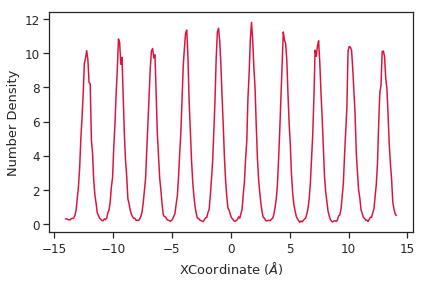

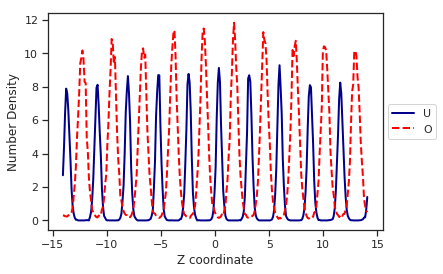

In [5]:
# 4) One Dimensional Density Plot
tx, ty = total_density.one_dimensional_density(Bin=0.1, direction="x")
cx, cy = ca_density.one_dimensional_density(Bin=0.1, direction="x")
fx, fy = f_density.one_dimensional_density(Bin=0.1, direction="x")


plt.plot(cx, cy, color="darkblue", ls="-", lw=2, label="U")
plt.plot(fx, fy, color="red", ls="--", lw=2, label="O")
plt.ylabel("Number Density")
plt.xlabel("Z coordinate")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

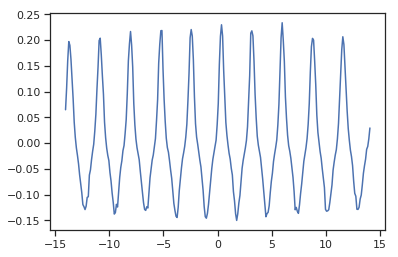

In [6]:
bin_volume = 0.1 * np.mean(data['lv'][:,1] * np.mean(data['lv'][:,2]))
charge_density = ut.charge_density([fy, cy], [-1.0, 2.0], bin_volume)
plt.plot(fx, charge_density)
plt.show()

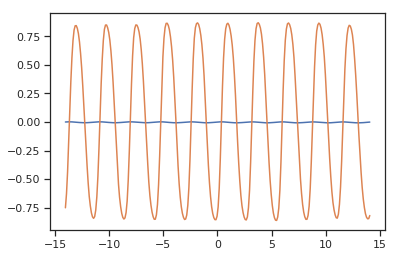

In [11]:
dx, e_field, potential = ut.poisson_solver(fx, charge_density, data['timesteps'])

plt.plot(dx, potential)
plt.plot(dx, e_field)
plt.show()

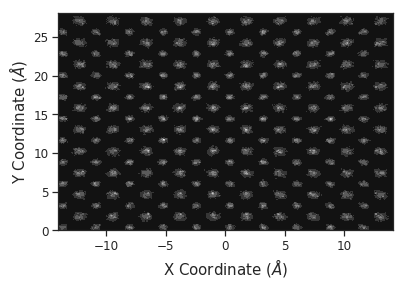

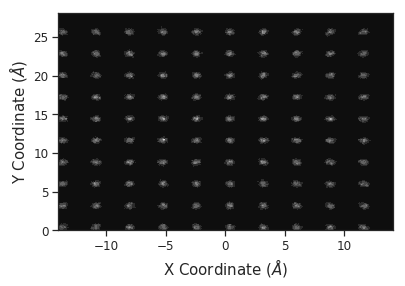

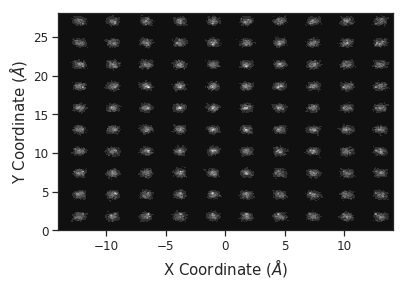

In [8]:
# 5) Two Dimensional Density Plot

tx, ty, tz = total_density.two_dimensional_density(box=0.1)
cx, cy, cz = ca_density.two_dimensional_density(box=0.1)
fx, fy, fz = f_density.two_dimensional_density(box=0.1)



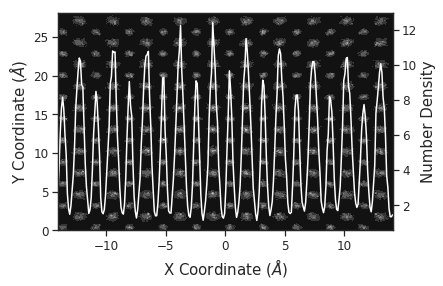

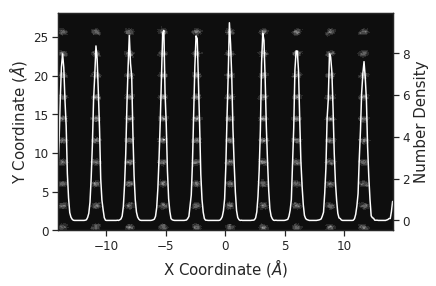

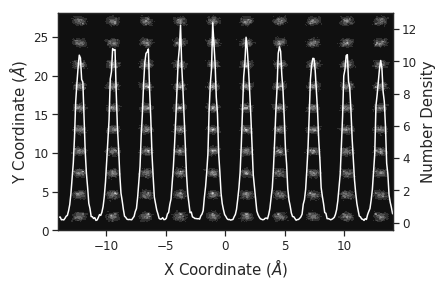

(array([-14.0391, -13.9391, -13.8391, -13.7391, -13.6391, -13.5391,
        -13.4391, -13.3391, -13.2391, -13.1391, -13.0391, -12.9391,
        -12.8391, -12.7391, -12.6391, -12.5391, -12.4391, -12.3391,
        -12.2391, -12.1391, -12.0391, -11.9391, -11.8391, -11.7391,
        -11.6391, -11.5391, -11.4391, -11.3391, -11.2391, -11.1391,
        -11.0391, -10.9391, -10.8391, -10.7391, -10.6391, -10.5391,
        -10.4391, -10.3391, -10.2391, -10.1391, -10.0391,  -9.9391,
         -9.8391,  -9.7391,  -9.6391,  -9.5391,  -9.4391,  -9.3391,
         -9.2391,  -9.1391,  -9.0391,  -8.9391,  -8.8391,  -8.7391,
         -8.6391,  -8.5391,  -8.4391,  -8.3391,  -8.2391,  -8.1391,
         -8.0391,  -7.9391,  -7.8391,  -7.7391,  -7.6391,  -7.5391,
         -7.4391,  -7.3391,  -7.2391,  -7.1391,  -7.0391,  -6.9391,
         -6.8391,  -6.7391,  -6.6391,  -6.5391,  -6.4391,  -6.3391,
         -6.2391,  -6.1391,  -6.0391,  -5.9391,  -5.8391,  -5.7391,
         -5.6391,  -5.5391,  -5.4391,  -5.3391, 

In [9]:
total_density.one_and_two_dimension_overlay(box=0.1)
ca_density.one_and_two_dimension_overlay(box=0.1)
f_density.one_and_two_dimension_overlay(box=0.1)